In [ ]:
import numpy as np

import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.activations import relu,linear
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from tensorflow.keras.optimizers import Adam

import logging
logging.getLogger("tensorflow").setLevel(logging.ERROR)

from public_tests_a1 import *

tf.keras.backend.set_floatx('float64')
from assigment_utils import *

tf.autograph.set_verbosity(0)

In [ ]:
# Generate some data
X,y,x_ideal,y_ideal = gen_data(18, 2, 0.7)
print("X.shape", X.shape, "y.shape", y.shape)

X.shape (18,) y.shape (18,)


In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.33,random_state=1)
print("X_train.shape", X_train.shape, "y_train.shape", y_train.shape)
print("X_test.shape", X_test.shape, "y_test.shape", y_test.shape)

X_train.shape (12,) y_train.shape (12,)
X_test.shape (6,) y_test.shape (6,)


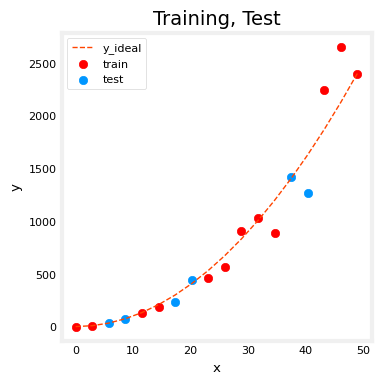

In [ ]:
fig, ax = plt.subplots(1,1,figsize=(4,4))
ax.plot(x_ideal, y_ideal, "--", color = "orangered", label="y_ideal", lw=1)
ax.set_title("Training, Test",fontsize = 14)
ax.set_xlabel("x")
ax.set_ylabel("y")

ax.scatter(X_train, y_train, color = "red",           label="train")
ax.scatter(X_test, y_test,   color = dlc["dlblue"],   label="test")
ax.legend(loc='upper left')
plt.show()

In [ ]:
from google.colab import output
output.enable_custom_widget_manager()

In [ ]:
import math
def mse(y,yhat):
  y=np.array(y)
  y=np.array(y)
  n=len(y)
  error=0
  for i in range(n):
    error+=(y[i]-yhat[i])**2



  return error/(2*n)


In [ ]:
y_hat = np.array([2.4, 4.2])
y_tmp = np.array([2.3, 4.1])
mse(y_hat, y_tmp)

0.0050000000000000305

In [ ]:
#creating a high degree polyonmial to fit the data
degree=10
lmodel = lin_model(degree)
lmodel.fit(X_train, y_train)

In [ ]:
# predict on training data, find training error
yhat = lmodel.predict(X_train)
err_train = lmodel.mse(y_train, yhat)

# predict on test data, find error
yhat = lmodel.predict(X_test)
err_test = lmodel.mse(y_test, yhat)

print(f"training err {err_train:0.2f}, test err {err_test:0.2f}")

training err 58.01, test err 171215.01


In [ ]:
x_poly1=poly.fit_transform(X_test)
y_poly1=poly.fit_transform(y_test)

y_hat1=model.predict(x_poly1)
mean_squared_error(y_poly1,y_hat1)

1.7021004477356457e+65

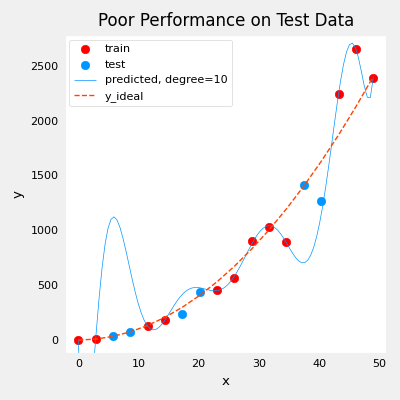

In [ ]:
# plot predictions over data range
x = np.linspace(0,int(X.max()),100)  # predict values for plot
y_pred = lmodel.predict(x).reshape(-1,1)

plt_train_test(X_train, y_train, X_test, y_test, x, y_pred, x_ideal, y_ideal, degree)

In [ ]:
# use of splitting data into train,cross_validation,test

#train - tune the w and bias of model
#cross_validation  - tune the other parameters of the model like nn arch ,deg of poly,reg term
#test - to print out a report after tuning

In [ ]:
# Generate  data
X,y, x_ideal,y_ideal = gen_data(40, 5, 0.7)
print("X.shape", X.shape, "y.shape", y.shape)

X.shape (40,) y.shape (40,)


In [ ]:
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.40,random_state=1)

x_cv,x_test,y_cv,y_test=train_test_split(x_test,y_test,test_size=0.50,random_state=1)

print("x_train.shape", x_train.shape, "y_train.shape", y_train.shape)
print("x_cv.shape", x_cv.shape, "y_cv.shape", y_cv.shape)
print("x_test.shape", x_test.shape, "y_test.shape", y_test.shape)

x_train.shape (24,) y_train.shape (24,)
x_cv.shape (8,) y_cv.shape (8,)
x_test.shape (8,) y_test.shape (8,)


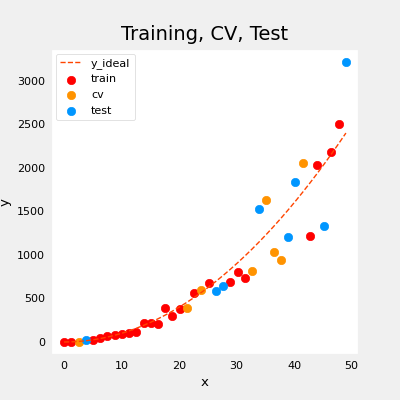

In [ ]:
#plot the data
fig, ax = plt.subplots(1,1,figsize=(4,4))
ax.plot(x_ideal, y_ideal, "--", color = "orangered", label="y_ideal", lw=1)
ax.set_title("Training, CV, Test",fontsize = 14)
ax.set_xlabel("x")
ax.set_ylabel("y")

ax.scatter(x_train, y_train, color = "red",           label="train")
ax.scatter(x_cv, y_cv,       color = dlc["dlorange"], label="cv")
ax.scatter(x_test, y_test,   color = dlc["dlblue"],   label="test")
ax.legend(loc='upper left')
plt.show()

In [ ]:
max_degree=9
err_train=np.zeros(max_degree)
err_cv=np.zeros(max_degree)
x = np.linspace(0,int(X.max()),100)
y_pred = np.zeros((100,max_degree))  #columns are lines to plot

for i in range(max_degree):
    lmodel=lin_model(i+1)
    lmodel.fit(x_train,y_train)
    yhat=lmodel.predict(x_train)
    err_train[i]=mse(y_train,yhat)
    yhat=lmodel.predict(x_cv)
    err_cv[i]=mse(y_cv,yhat)
    y_pred[:,i]=lmodel.predict(x)

optimal_degree = np.argmin(err_cv)+1
optimal_degree

2

In [ ]:
for i in range(max_degree):
    print("train error:",err_train[i]," cv error:",err_cv[i]," degree:",i+1)


train error: 33075.06272230587  cv error: 57076.43741977634  degree: 1
train error: 10284.869644500812  cv error: 39591.78544762841  degree: 2
train error: 8414.672415149622  cv error: 42671.91459548511  degree: 3
train error: 5572.77552306455  cv error: 60706.11598540758  degree: 4
train error: 4983.975664000554  cv error: 63952.43557854177  degree: 5
train error: 4735.366000048871  cv error: 72688.7537380456  degree: 6
train error: 4008.192574565774  cv error: 115892.49597385328  degree: 7
train error: 3820.882456185141  cv error: 129498.68401854276  degree: 8
train error: 3780.2680797239104  cv error: 140864.17623265117  degree: 9


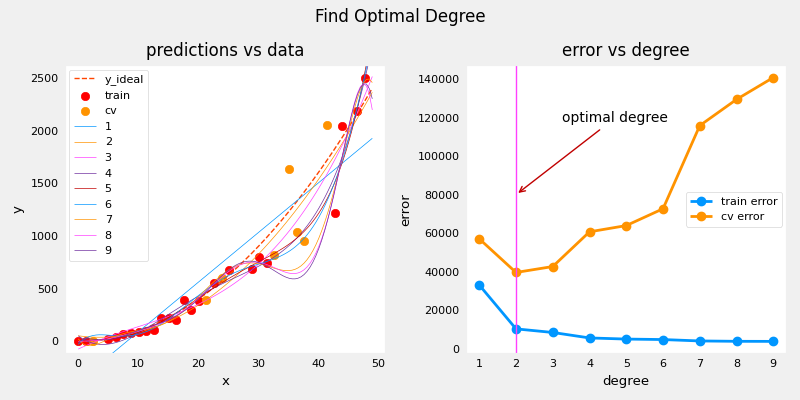

In [ ]:
plt.close("all")
plt_optimal_degree(x_train, y_train, x_cv, y_cv, x, y_pred, x_ideal, y_ideal,
                   err_train, err_cv, optimal_degree, max_degree)

In [ ]:
lmodel=lin_model(optimal_degree)
lmodel.fit(x_train,y_train)
yhat=lmodel.predict(x_test)
mse(y_test,yhat)

94835.15052955759

In [ ]:
y_test_array=np.array(y_test)
yhat_array=np.array(yhat)
n=len(y_test_array)
for i in range(n):
  print(y_test_array[i],yhat_array[i])

582.0307535577185 625.8427209257254
1332.1363310915706 1993.3444306702982
3217.188933793 2362.710065835551
18.3701736862205 39.35889461195609
648.872343749814 692.1555366674243
1842.5787075324163 1550.5648469325072
1524.49095418085 1076.9781116072163
1203.2696206676874 1448.7463670366092


In [ ]:
#regularisation

lambda_range=np.array([0.0, 1e-6, 1e-5, 1e-4,1e-3,1e-2, 1e-1,1,10,100])
steps=len(lambda_range)
train_err=np.zeros(steps)
cv_err=np.zeros(steps)
degree=10
x = np.linspace(0,int(X.max()),100)
y_pred = np.zeros((100,steps))  #columns are lines to plot

for i in range(steps):
  lambda_=lambda_range[i]
  lmodel=lin_model(degree,regularization=True,lambda_=lambda_)
  lmodel.fit(x_train,y_train)
  yhat=lmodel.predict(x_train)
  train_err[i]=mse(y_train,yhat)
  yhat=lmodel.predict(x_cv)
  cv_err[i]=mse(y_cv,yhat)
  y_pred[:,i]=lmodel.predict(x)
optimal_reg_idx=np.argmin(cv_err)
print(lambda_range[np.argmin(cv_err)])

1.0


In [ ]:
for i in range(steps):
  print("train error:",train_err[i]," cv error:",cv_err[i]," lambda:",lambda_range[i])

train error: 3045.804346757542  cv error: 332318.15742312995  lambda: 0.0
train error: 3896.86916961906  cv error: 115064.086691333  lambda: 1e-06
train error: 4072.2848835765217  cv error: 98995.60983512744  lambda: 1e-05
train error: 4506.767875315616  cv error: 76072.54077323568  lambda: 0.0001
train error: 4962.436119287969  cv error: 64245.44326596746  lambda: 0.001
train error: 5275.728434897748  cv error: 58922.77208636258  lambda: 0.01
train error: 5636.861065275535  cv error: 56996.52479639568  lambda: 0.1
train error: 6308.566660111396  cv error: 54961.40869120667  lambda: 1.0
train error: 8746.364553028108  cv error: 68104.58886429253  lambda: 10.0
train error: 33994.14204340546  cv error: 119626.41943767821  lambda: 100.0


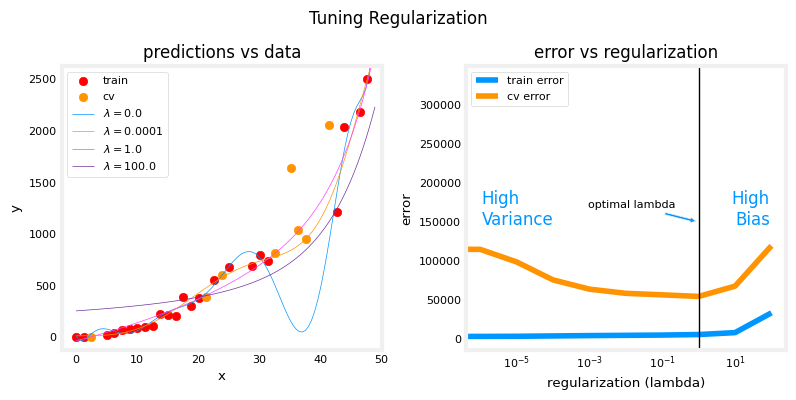

In [ ]:
plt.close("all")
plt_tune_regularization(x_train, y_train, x_cv, y_cv, x, y_pred, train_err,cv_err, optimal_reg_idx, lambda_range)

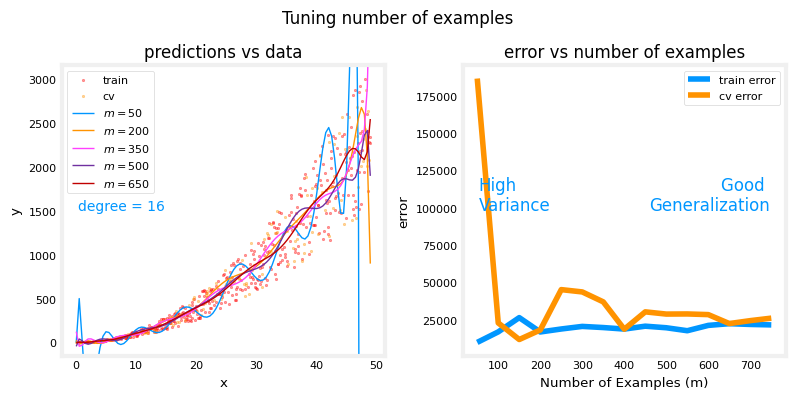

In [ ]:
x_train, y_train, x_cv, y_cv, x, y_pred, train_err, cv_err, m_range,degree = tune_m()
plt_tune_m(x_train, y_train, x_cv, y_cv, x, y_pred, train_err, cv_err, m_range, degree)

In [ ]:
#Evaluating learning alogritm for NN
# Generate and split data set
X, y, centers, classes, std = gen_blobs()

# split the data. Large CV population for demonstration
X_train, X_, y_train, y_ = train_test_split(X,y,test_size=0.50, random_state=1)
X_cv, X_test, y_cv, y_test = train_test_split(X_,y_,test_size=0.20, random_state=1)
print("X_train.shape:", X_train.shape, "X_cv.shape:", X_cv.shape, "X_test.shape:", X_test.shape)

X_train.shape: (400, 2) X_cv.shape: (320, 2) X_test.shape: (80, 2)


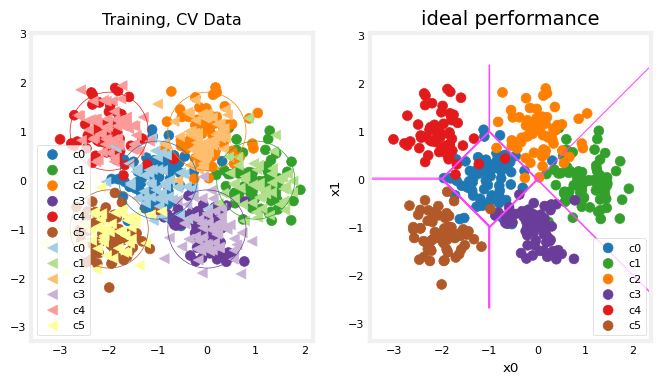

In [ ]:
plt_train_eq_dist(X_train, y_train,classes, X_cv, y_cv, centers, std)

In [ ]:
def cat_eval_err(yhat,y):
  n=len(y)
  incorrect=0

  for i in range(n):
    if (y[i]!=yhat[i]):
      incorrect+=1

  return incorrect/n

In [ ]:
y_hat = np.array([1, 2, 0])
y_tmp = np.array([1, 2, 3])
print(f"categorization error {np.squeeze(cat_eval_err(y_hat, y_tmp)):0.3f}, expected:0.333" )
y_hat = np.array([[1], [2], [0], [3]])
y_tmp = np.array([[1], [2], [1], [3]])
print(f"categorization error {np.squeeze(cat_eval_err(y_hat, y_tmp)):0.3f}, expected:0.250" )



categorization error 0.333, expected:0.333
categorization error 0.250, expected:0.250


In [ ]:

model=Sequential([Dense(units=120,activation=relu,name="layer1"),
                 Dense(units=40,activation=relu,name="layer2"),
                 Dense(units=6,activation=linear,name="layer3")])
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
              loss=SparseCategoricalCrossentropy(from_logits=True))

model.fit( X_train, y_train,
    epochs=1000)

Epoch 1/1000
13/13 [==============================] - 2s 3ms/step - loss: 1.0647
Epoch 2/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.4043
Epoch 3/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3299
Epoch 4/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.2600
Epoch 5/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.2673
Epoch 6/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.2443
Epoch 7/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.2234
Epoch 8/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.2261
Epoch 9/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.2191
Epoch 10/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.2314
Epoch 11/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.2193
Epoch 12/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.2206
Epoch 13/1000
13/13 [====

In [ ]:
model.summary()

model_test(model, classes, X_train.shape[1])

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 layer1 (Dense)              (None, 120)               360       
                                                                 
 layer2 (Dense)              (None, 40)                4840      
                                                                 
 layer3 (Dense)              (None, 6)                 246       
                                                                 
Total params: 5446 (42.55 KB)
Trainable params: 5446 (42.55 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
All tests passed!


1082/1082 [==============================] - 2s 2ms/step


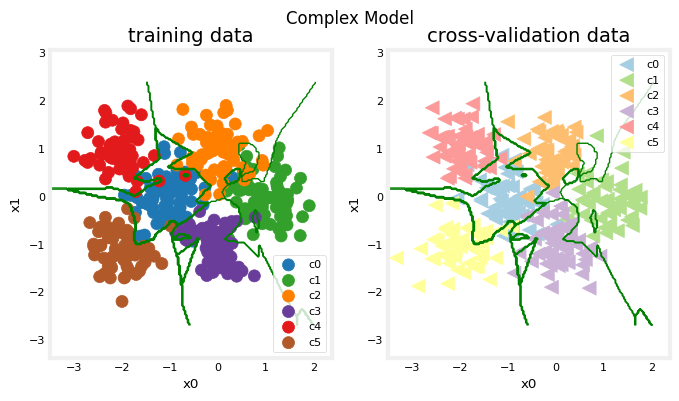

In [ ]:
#make a model for plotting routines to call
model_predict = lambda Xl: np.argmax(tf.nn.softmax(model.predict(Xl)).numpy(),axis=1)
plt_nn(model_predict,X_train,y_train, classes, X_cv, y_cv, suptitle="Complex Model")

In [ ]:
training_cerr_complex = eval_cat_err(y_train, model_predict(X_train))
cv_cerr_complex = eval_cat_err(y_cv, model_predict(X_cv))
print(f"categorization error, training, complex model: {training_cerr_complex:0.3f}")
print(f"categorization error, cv,       complex model: {cv_cerr_complex:0.3f}")

10/10 [==============================] - 0s 2ms/step
categorization error, training, complex model: 0.005
categorization error, cv,       complex model: 0.119


In [ ]:

model1=Sequential([Dense(units=6,activation='relu',name="layer1"),Dense(units=6,activation="linear",name="layer2")])
model1.compile(loss=SparseCategoricalCrossentropy(from_logits=True),optimizer=Adam(learning_rate=0.01))

model1.fit(X_train,y_train,epochs=1000)

Epoch 1/1000
13/13 [==============================] - 1s 2ms/step - loss: 2.1226
Epoch 2/1000
13/13 [==============================] - 0s 2ms/step - loss: 1.7959
Epoch 3/1000
13/13 [==============================] - 0s 2ms/step - loss: 1.6011
Epoch 4/1000
13/13 [==============================] - 0s 2ms/step - loss: 1.4407
Epoch 5/1000
13/13 [==============================] - 0s 2ms/step - loss: 1.2865
Epoch 6/1000
13/13 [==============================] - 0s 2ms/step - loss: 1.1393
Epoch 7/1000
13/13 [==============================] - 0s 2ms/step - loss: 1.0014
Epoch 8/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.8860
Epoch 9/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.7850
Epoch 10/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.7025
Epoch 11/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.6291
Epoch 12/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.5700
Epoch 13/1000
13/13 [====

In [ ]:
model1.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 layer1 (Dense)              (None, 6)                 18        
                                                                 
 layer2 (Dense)              (None, 6)                 42        
                                                                 
Total params: 60 (480.00 Byte)
Trainable params: 60 (480.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Support for third party widgets will remain active for the duration of the session. To disable support:

In [ ]:
from google.colab import output
output.disable_custom_widget_manager()